## **Import Libraries**

In [215]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## **load dataset**

In [216]:
##### load dataset ####
load_data = pd.read_csv("data.csv")
print(load_data.shape)
print(load_data.head())
print(load_data.describe())

(18, 4)
     x1    x2    x3    y
0  1.60  1.12  0.16  0.0
1  1.60  1.60  1.60  1.0
2  0.40  1.52  1.44  1.0
3  0.16  1.52  1.36  1.0
4  1.39  0.00  0.16  0.0
              x1        x2         x3          y
count  18.000000  18.00000  18.000000  18.000000
mean    0.913444   0.89600   0.825778   0.500000
std     0.651235   0.65908   0.651361   0.514496
min     0.000000   0.00000   0.000000   0.000000
25%     0.284000   0.26000   0.176000   0.000000
50%     1.295000   1.24000   0.800000   0.500000
75%     1.462500   1.50000   1.440000   1.000000
max     1.600000   1.60000   1.600000   1.000000


## **set prototype**

In [217]:
#### set prototype ####
prototype = load_data[:2][['x1','x2','x3']].values.tolist()
train_data = load_data[2:][['x1','x2','x3']].values.tolist()
train_data_label = load_data[2:]['y'].tolist()
print(prototype)
print(train_data)
print(train_data_label)

[[1.6, 1.12, 0.16], [1.6, 1.6, 1.6]]
[[0.4, 1.52, 1.44], [0.16, 1.52, 1.36], [1.39, 0.0, 0.16], [1.31, 0.32, 0.224], [1.28, 0.32, 0.32], [0.0, 1.36, 1.6], [1.6, 0.0, 0.0], [0.272, 1.6, 1.28], [1.44, 0.16, 0.16], [1.36, 0.32, 0.32], [0.32, 1.44, 1.28], [0.48, 1.44, 1.44], [0.0, 1.6, 1.6], [0.16, 1.36, 1.44], [1.47, 0.24, 0.16], [1.6, 0.208, 0.32]]
[1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]


In [218]:
print(train_data[0])

[0.4, 1.52, 1.44]


In [219]:
result = load_data.columns
# Print the result
print(result)

Index(['x1', 'x2', 'x3', 'y'], dtype='object')


In [220]:
print(load_data['x1'])

0     1.600
1     1.600
2     0.400
3     0.160
4     1.390
5     1.310
6     1.280
7     0.000
8     1.600
9     0.272
10    1.440
11    1.360
12    0.320
13    0.480
14    0.000
15    0.160
16    1.470
17    1.600
Name: x1, dtype: float64


## **show Plot data in 3D befor train**

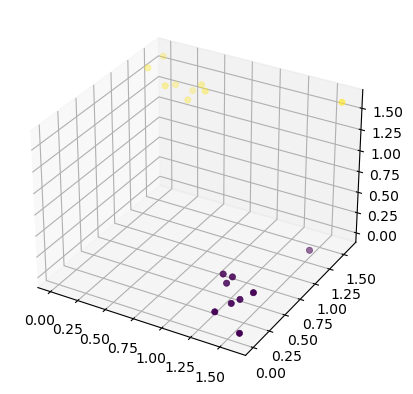

In [221]:
##### Plot Samples in 3D #####
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(load_data['x1'],load_data['x2'],load_data['x3'],c=load_data['y'],cmap='viridis', linewidth=0.5)



## **LVQ1 Model Implementation From Scratch**

In [222]:
import math
import collections

##### Implement your LVQ1 model here#####

class LVQ:

  def __init__(self, epochs, alpha,weight):
    self.epochs = epochs
    self.alpha = alpha
    self.weights = weight
  def winner(self,sample):
    D0 = 0
    D1 = 0
    for i  in range( len( sample ) ) :

      D0 = D0 +  (( sample[i] - self.weights[0][i] ) ** 2 )
      D1 = D1 + (( sample[i] - self.weights[1][i] ) ** 2 )


    if D0 > D1 :
        return 0
    else :
        return 1


  def update(self, sample, winner, actual ) :
      if actual == winner:
          for i in range(len(self.weights[winner])) :
            self.weights[winner][i] = self.weights[winner][i] + self.alpha * ( sample[i] - self.weights[winner][i] )
      else:
        for i in range(len(self.weights[winner])) :

            self.weights[winner][i] = self.weights[winner][i] - self.alpha * ( sample[i] - self.weights[winner][i] )


  def train(self,train_feature,train_label):
    # elements_count = collections.Counter(train_label)
    # number_elements = len(elements_count.keys())
    # self.weights = np.random.rand(number_elements,train_feature.shape[1])

    for i in range(self.epochs) :

        for j in range(len(train_feature)):
            # Sample selection
            sample = train_feature[j]
            # print(sample)
            # Compute winner
            winner = self.winner(sample)
            # Update weights
            self.update(sample, winner, train_label[j])

    print("your model learn")

  def predict(self,sample):
        return self.winner(sample)
    

## **Train Model**

In [223]:
##### Implement your LVQ1 model here#####

lvq = LVQ(10,0.5,prototype)
lvq.train(train_data,train_data_label)

your model learn


## **show plot data in 3D after train**

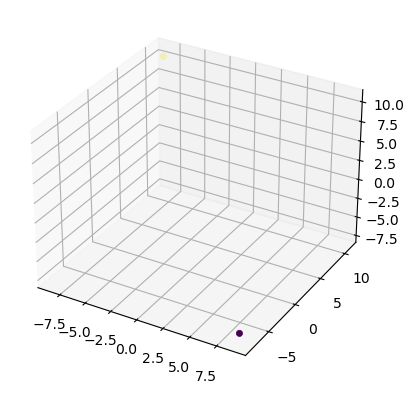

In [224]:
##### Plot Samples Again To Observe The Changes In Prototypes After Training #####
ax = plt.axes(projection='3d')
df4 = pd.DataFrame({'x1': [item[0] for item in lvq.weights], 'x2': [item[1] for item in lvq.weights],'x3':[item[2] for item in lvq.weights]})
ax.scatter3D(df4['x1'],df4['x2'],df4['x3'],c=[0,1],cmap='viridis', linewidth=0.5)


## **Test Model**

In [225]:
##### Test The Model With The Given Sample #####


test_sample = np.array([0.304, 1.488, 1.408])
print(lvq.weights)
print(lvq.predict(test_sample))


[[8.88085071218115, -7.8484610616231265, -7.156998408354407], [-8.439030982220054, 10.967530295789171, 10.264657635461221]]
1
